In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [2]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"

In [4]:
data=pd.read_csv(url,parse_dates=['Month'])

In [5]:
data.head()

,Month,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


In [6]:
data.describe()

,Sunspots
count,2820.000000
mean,51.265957
std,43.448971
min,0.000000
25%,15.700000
50%,42.000000
75%,74.925000
max,253.800000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Month     2820 non-null   datetime64[ns]
 1   Sunspots  2820 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 44.2 KB


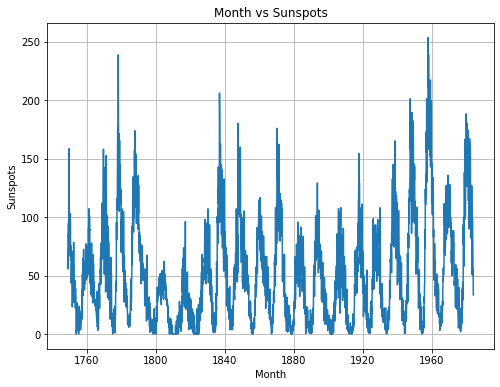

In [8]:
plt.figure(figsize=(8,6))
plt.plot(data['Month'],data['Sunspots'])
plt.xlabel("Month")
plt.ylabel("Sunspots")
plt.title("Month vs Sunspots")
plt.grid(True)
plt.show()

In [9]:
data['Month']=pd.to_datetime(data['Month'])

In [10]:
datanew=data.set_index(data['Month'])

In [11]:
data1=datanew.drop(labels=['Month'],axis=1)

<AxesSubplot:xlabel='Month'>

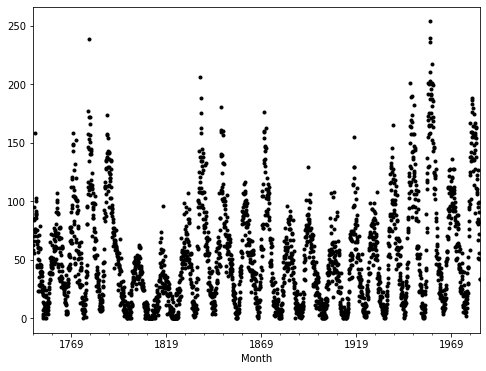

In [13]:
fig=plt.figure(figsize=(8,6))
data1['Sunspots'].plot(style='k.')

In [14]:
data_q=data1.resample('q').mean()

In [15]:
data_q.head()

,Sunspots
Month,
1749-03-31,63.533333
1749-06-30,74.733333
1749-09-30,79.000000
1749-12-31,106.433333
1750-03-31,79.466667


<AxesSubplot:xlabel='Month'>

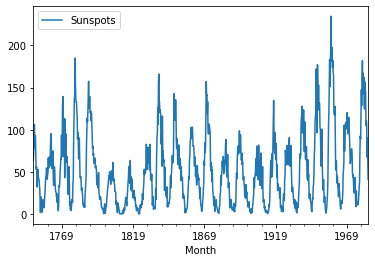

In [19]:
def add_fullertest(data):
    result=adfuller(data)
    labels=['ADF Tesr Statistic','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+":"+str(value))
    if result[1]<=0.05:
        print("strong evidence against the null hypothesis(Ho),reject the null hypothesis .Data has no unit root and is stationary")
    else:
        print("weak against the null hypothesis,time series has a unit root,indicating it is a non stationary")
data_q.plot()

In [20]:
base_data=data_q.copy()

<AxesSubplot:xlabel='Month'>

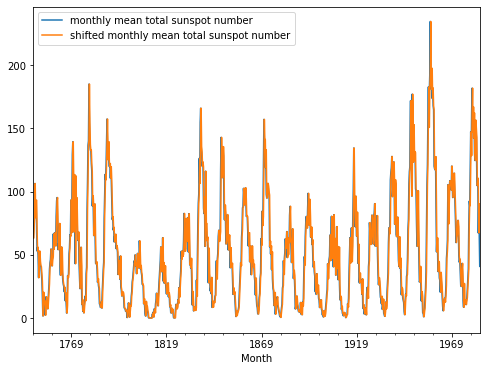

In [22]:
base_data['monthly mean total sunspot number']=base_data['Sunspots']
base_data['shifted monthly mean total sunspot number']=base_data['Sunspots'].shift(1)
base_data[['monthly mean total sunspot number','shifted monthly mean total sunspot number']].plot(figsize=(8,6))

In [23]:
base_data=base_data.dropna()

In [25]:
print("Mean Squared Error:",str(mean_squared_error(base_data['monthly mean total sunspot number'],base_data['shifted monthly mean total sunspot number'])))

Mean Squared Error: 238.7011821086262


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

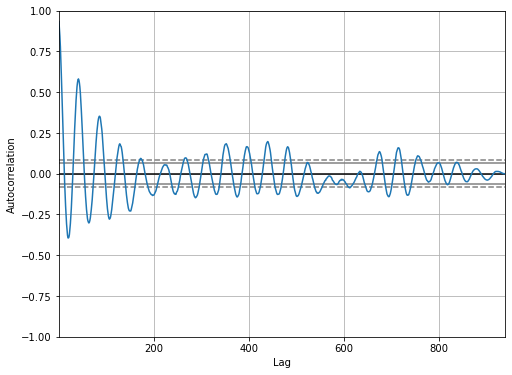

In [28]:
fig=plt.figure(figsize=(8,6))
autocorrelation_plot(data_q)

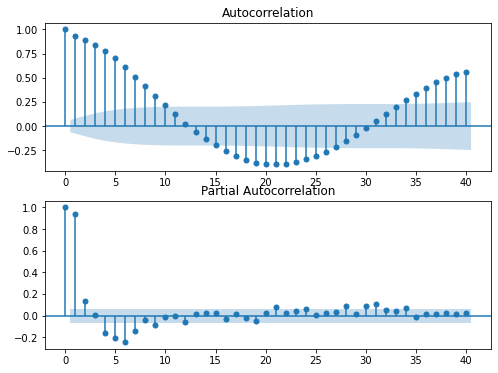

In [30]:
fig=plt.figure(figsize=(8,6))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(data_q,lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(data_q,lags=40,ax=ax2)

In [33]:
model=sm.tsa.statespace.SARIMAX(data_q['Sunspots'],order=(2,0,2),seasonal_order=(2,0,2,6))
results=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          Sunspots   No. Observations:                  940
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 6)   Log Likelihood               -3859.946
Date:                           Thu, 21 Mar 2024   AIC                           7737.893
Time:                                   14:25:13   BIC                           7781.506
Sample:                               03-31-1749   HQIC                          7754.519
                                    - 12-31-1983                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7895      0.077     23.329      0.000       1.639       1.940
ar.L2         -0.7909      0.077    -10.289      0.000      -0.942      -0.640
ma.L1         -1.1076      0.074    -15.044      0.000      -1.252      -0.963
ma.L2          0.3436      0.025     13.745      0.000       0.295       0.393
ar.S.L6        1.2732      0.043     29.616      0.000       1.189       1.357
ar.S.L12      -0.9219      0.043    -21.393      0.000      -1.006      -0.837
ma.S.L6       -1.2802      0.052    -24.394      0.000      -1.383      -1.177
ma.S.L12       0.8761      0.051     17.130      0.000       0.776       0.976
sigma2       214.6256      7.303     29.387      0.000     200.311     228.940
===================================================================================
Ljung-Box (L1) (Q):                   2.10   Jarque-Bera (JB):               129.40
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:xlabel='Month'>

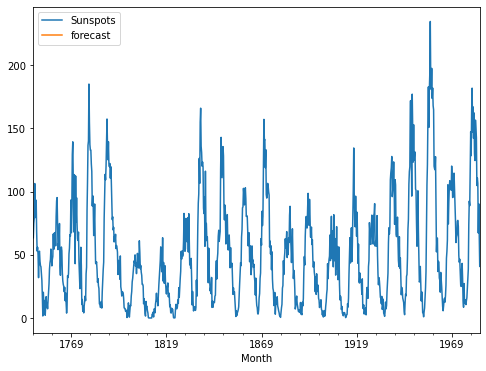

In [36]:
data_q['forecast']=results.predict(start=1000,end=1084,dynamic=True)
data_q[['Sunspots','forecast']].plot(figsize=(8,6))